# LSTM

In [29]:
import pandas as pd
import torch
import numpy as np
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt

In [30]:
#df = pd.read_csv('../data/Avtice-losses.csv', skiprows=1)
df = pd.read_csv('merged_data_patrick.csv', index_col = "Zeitstempel")

In [31]:
df.head()

,MWh
Zeitstempel,
2019-01-01 00:00:00,39.143346
2019-01-01 00:15:00,32.788069
2019-01-01 00:30:00,33.018916
2019-01-01 00:45:00,34.574673
2019-01-01 01:00:00,33.417096


In [32]:
df.dtypes

MWh    float64
dtype: object

In [5]:
df_new_index = df.set_index("Unnamed: 0")
df_new_index

,kWh,MWh,solar_fore_de [MW],solar_fore_it [MW],wind_fore_de [MW],wind_fore_it [MW],temperature_fore_ch,temperature_fore_fr,temperature_fore_de,temperature_fore_it,CH_AT,CH_DE,CH_FR,CH_IT,AT_CH,DE_CH,FR_CH,IT_CH
Unnamed: 0,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,139525.003695,139.525004,0.0,0.0,21344.8514,4302.6977,4.1067,5.972900,7.426800,4.028100,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0
2019-01-01 01:00:00,129716.036003,129.716036,0.0,0.0,23052.3310,4596.5916,4.1067,5.972900,7.426800,4.028100,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0
2019-01-01 02:00:00,133398.074458,133.398074,0.0,0.0,24969.9701,4478.5564,3.7155,5.900717,7.246083,3.811433,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0
2019-01-01 03:00:00,135133.851731,135.133852,0.0,0.0,27082.9626,4323.3712,3.3243,5.828533,7.065367,3.594767,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0
2019-01-01 04:00:00,131699.424059,131.699424,0.0,0.0,26890.9717,4231.8283,2.9331,5.756350,6.884650,3.378100,700.0,4000.0,1200.0,2513.0,1200.0,800.0,3000.0,1910.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,171707.317615,171.707318,0.0,0.0,36997.7200,1108.4000,8.5300,9.960000,10.790000,9.590000,1200.0,4000.0,1400.0,4069.0,1200.0,800.0,3200.0,1810.0
2021-12-31 20:00:00,159462.903412,159.462903,0.0,0.0,35666.9300,1077.9700,8.0000,9.400000,10.630000,9.110000,1200.0,4000.0,1400.0,4069.0,1200.0,800.0,3200.0,1810.0
2021-12-31 21:00:00,155109.519730,155.109520,0.0,0.0,34383.8800,1048.2800,7.5000,8.880000,10.510000,8.670000,1200.0,4000.0,1400.0,3953.0,1200.0,800.0,3200.0,1810.0


In [6]:
#df_new_index.drop(columns=["kWh", "temperature_fore_fr", "temperature_fore_de", "temperature_fore_it", "IT_CH"], inplace=True)
df_new_index = df_new_index[["kWh", "MWh"]]
df_new_index

,kWh,MWh
Unnamed: 0,,
2019-01-01 00:00:00,139525.003695,139.525004
2019-01-01 01:00:00,129716.036003,129.716036
2019-01-01 02:00:00,133398.074458,133.398074
2019-01-01 03:00:00,135133.851731,135.133852
2019-01-01 04:00:00,131699.424059,131.699424
...,...,...
2021-12-31 19:00:00,171707.317615,171.707318
2021-12-31 20:00:00,159462.903412,159.462903
2021-12-31 21:00:00,155109.519730,155.109520


In [33]:
#Split 80/20

split_index = 20000
df_train, df_test = df[:split_index], df[split_index:]
len(df_train), len(df_test)

(20000, 85216)

In [36]:
# Generate Pytorch Window Generator

import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader



class PyTorchWindowGenerator():
    def __init__(self, input_width, label_width, shift,
                 train_df, test_df, label_columns=None, batch_size=32):
        self.train_data = torch.tensor(train_df.values, dtype=torch.float32)
        self.test_data = torch.tensor(test_df.values, dtype=torch.float32)
        
        self.batch_size = batch_size

        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def split_window(self, features):
        inputs = features[self.input_slice, :]
        labels = features[self.labels_slice, :]
        if self.label_columns is not None:
            labels = torch.stack([labels[:, self.column_indices[name]] for name in self.label_columns], axis=-1)

        return inputs, labels

    def make_dataset(self, data):
        sequence_length = self.total_window_size
        sequences = data.unfold(0, sequence_length, 1).permute(0, 2, 1)
        dataset = [self.split_window(sequence) for sequence in sequences]
        return DataLoader(dataset, shuffle=True, batch_size=self.batch_size)

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

In [38]:
#Split Past/next day

train_width = 168
test_width = 24

#df_train, df_test

window = PyTorchWindowGenerator(input_width=train_width, label_width=test_width, shift=test_width, 
                                train_df=df_train, test_df=df_test, 
                                label_columns=["MWh"])

train_data = window.make_dataset(window.train_data)
test_data = window.make_dataset(window.test_data)

x, y = next(iter(train_data))
print("Input:")
print(x)
print("Output:")
print(y)

Input:
tensor([[[25.8018],
         [28.0601],
         [24.7044],
         ...,
         [28.3114],
         [28.8223],
         [27.8840]],

        [[15.4682],
         [15.0319],
         [16.6511],
         ...,
         [20.6795],
         [21.2419],
         [25.5342]],

        [[ 9.9952],
         [15.0790],
         [13.4309],
         ...,
         [17.6280],
         [15.4505],
         [17.2978]],

        ...,

        [[20.1433],
         [21.9532],
         [16.5261],
         ...,
         [12.2234],
         [ 8.4177],
         [12.4181]],

        [[24.3514],
         [26.9380],
         [24.6369],
         ...,
         [30.9937],
         [30.9669],
         [33.4621]],

        [[54.2415],
         [53.1947],
         [51.5193],
         ...,
         [20.2212],
         [20.1631],
         [20.0177]]])
Output:
tensor([[[27.6799],
         [28.4461],
         [27.2119],
         [26.6061],
         [29.2603],
         [27.2084],
         [25.2160],
         [26.14

In [39]:
# Generate LSTM Model

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_dim, num_predictions, dropout):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_size
        self.layer_dim = num_layers
        self.num_predictions = num_predictions  
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device=x.device).requires_grad_()
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device=x.device).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -self.num_predictions:, :])
        return out

In [40]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [41]:
input_size = 1  # Nur Temperatur
output_dim = 1  # Nur Temperatur
hidden_size = 1
num_layers = 15
dropout = 0
learn_rate = 0.01

model = LSTMModel(input_size , hidden_size , num_layers , output_dim, next(iter(test_data))[1].size(1), dropout)

model = model.to(device)

loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)

In [46]:
def do_train_daily(model, loss_fn, optimizer, train_data, device):
    total_mae_loss = 0.0

    model.train()
    for batch in train_data:
        inputs, targets = batch
        
        inputs = inputs[:, :, 0].unsqueeze(-1).to(device)
        targets = targets[:, :, 0].unsqueeze(-1).to(device)
        
        outputs = model(inputs)

        mae_loss = loss_fn(outputs, targets)

        total_mae_loss += mae_loss
        
        optimizer.zero_grad()
        mae_loss.backward()
        optimizer.step()

    mae_loss = total_mae_loss / len(train_data)
    
    return mae_loss


def do_evaluate_daily(model, loss_fn, test_data, device):
    model.eval()
    total_mae_loss = 0.0

    with torch.no_grad():
        for inputs, targets in test_data:

            inputs = inputs[:, :, 0].unsqueeze(-1).to(device)
            targets = targets[:, :, 0].unsqueeze(-1).to(device)

            outputs = model(inputs)
            mae_loss = loss_fn(outputs, targets)
            
            total_mae_loss += mae_loss.item()

    mae_loss = total_mae_loss / len(test_data)

    return mae_loss

In [ ]:
epochs = 5

result_train = []
result_test = []

for t in range(epochs):
    train_mae_loss = do_train_daily(model, loss_fn, optimizer, train_data, device)
    result_train.append(train_mae_loss)
    test_mae_loss = do_evaluate_daily(model, loss_fn, test_data, device)
    result_test.append(test_mae_loss)

    print(f'Train MAE Loss: {train_mae_loss.item():>6f},Test MAE Loss: {test_mae_loss:>6f}')

Train MAE Loss:    nan,Test MAE Loss:    nan
Train MAE Loss:    nan,Test MAE Loss:    nan
Train MAE Loss:    nan,Test MAE Loss:    nan
Train MAE Loss:    nan,Test MAE Loss:    nan


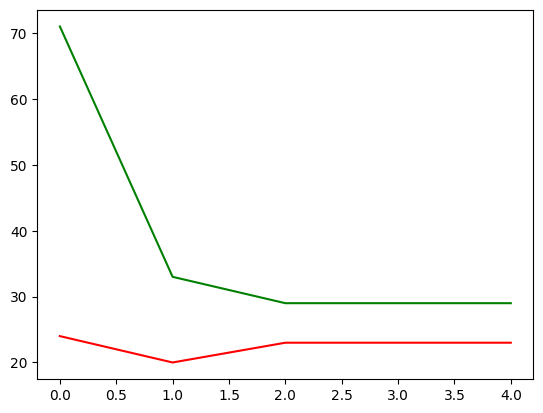

In [15]:
plt.plot(result_train, "g", result_test, "r")

Problem: Loss of Test is lower than loss of train. No significant overfitting.

In [16]:
len(train_data), len(test_data)

(620, 192)